In [1]:
#Purpose of this Notebook is to add analysis to report done on https://zanfoltyniak.substack.com/ regarding Ecuadors Economy 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 

In [3]:
pip install fredapi

Note: you may need to restart the kernel to use updated packages.


In [4]:
from fredapi import Fred
fred_key='b8b9f308990e644cb71c1835898420ed'
fred = Fred(api_key=fred_key)

In [33]:
#Pull all the search results for economic indicators relating to Ecuador 
# Set the option to display all rows
pd.set_option('display.max_rows', None)

# Assuming fred.search returns a DataFrame
sp_search = fred.search('Ecuador', order_by='popularity')


Text(0.05, -0.1, 'Data Source: FRED')

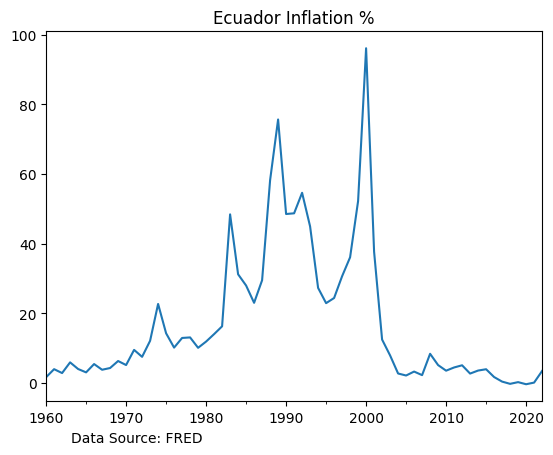

In [6]:
#Once found the series for Ecuador Inflation from search results 
Ecinflation=fred.get_series(series_id='FPCPITOTLZGECU')
Ecinflation.plot(title='Ecuador Inflation %')
plt.text(0.05, -0.1, 'Data Source: FRED', ha='left', va='center', transform=plt.gca().transAxes)

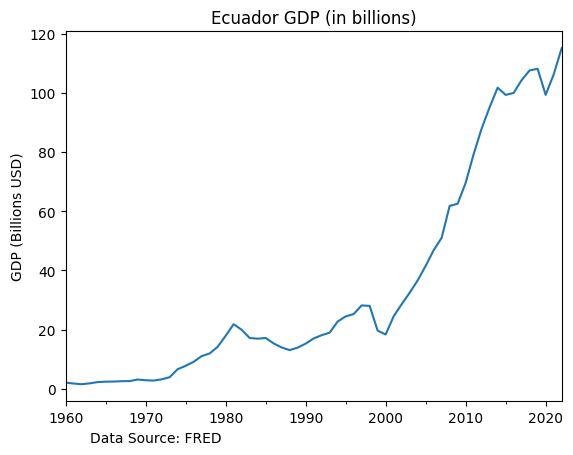

In [7]:
#Pull series from FRED site  for GDP
EcGDP = fred.get_series(series_id='MKTGDPECA646NWDB')

# Divide GDP values by 1 billion to scale the y-axis
(EcGDP / 1e9).plot(title='Ecuador GDP (in billions)')
plt.ylabel('GDP (Billions USD)')
plt.text(0.05, -0.1, 'Data Source: FRED', ha='left', va='center', transform=plt.gca().transAxes)

plt.show()

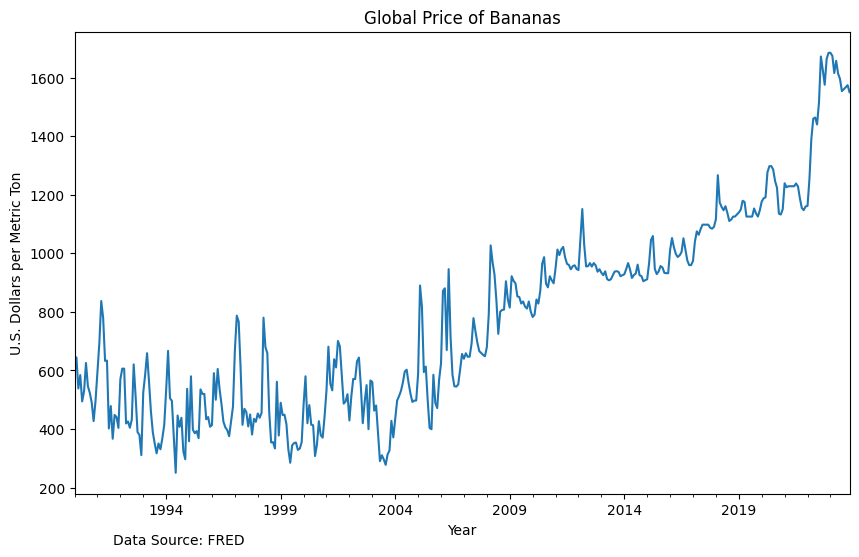

In [8]:
#Pulling Global Price of Bananas from FRED site 
import matplotlib.pyplot as plt

Ecbananas = fred.get_series(series_id='PBANSOPUSDM')
# Filter data starting from 1990
Ecbananas = Ecbananas['1990':]
plt.figure(figsize=(10, 6))

# Plot the data
Ecbananas.plot(title='Global Price of Bananas')

# Set labels for axes
plt.xlabel('Year')
plt.ylabel('U.S. Dollars per Metric Ton')

# Add text annotation for the data source at the bottom left
plt.text(0.05, -0.1, 'Data Source: FRED', ha='left', va='center', transform=plt.gca().transAxes)

plt.show()



In [32]:
# World Oil prices graph pulled from data at world bank 
excel_file_path = r'C:\Users\zan17\OneDrive\Documents\Academic Papers\Oil Price Data.xlsx'
df = pd.read_excel(excel_file_path)
df

,Venue,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Dubai,20.467885,16.589142,17.175664,14.964504,14.705192,16.128439,18.525910,18.153878,12.213138,...,96.513551,50.907729,41.469973,53.138422,69.169696,63.161605,42.607215,68.961360,95.288669,81.865295
1,U.K. Brent,23.706614,20.075370,19.358238,17.084759,15.959658,17.198748,20.808530,19.310324,13.126219,...,99.345446,53.022712,45.079076,54.886916,71.612593,64.198474,43.333843,70.831500,98.996328,82.321243
2,West Texas Intermediate,24.509717,21.490191,20.582609,18.474046,17.167957,18.414001,22.151895,20.590988,14.367870,...,93.119387,48.805325,43.242523,50.907597,64.815304,56.936923,39.355435,67.957075,94.801181,77.598185


In [31]:
df.set_index("Venue", inplace=True)

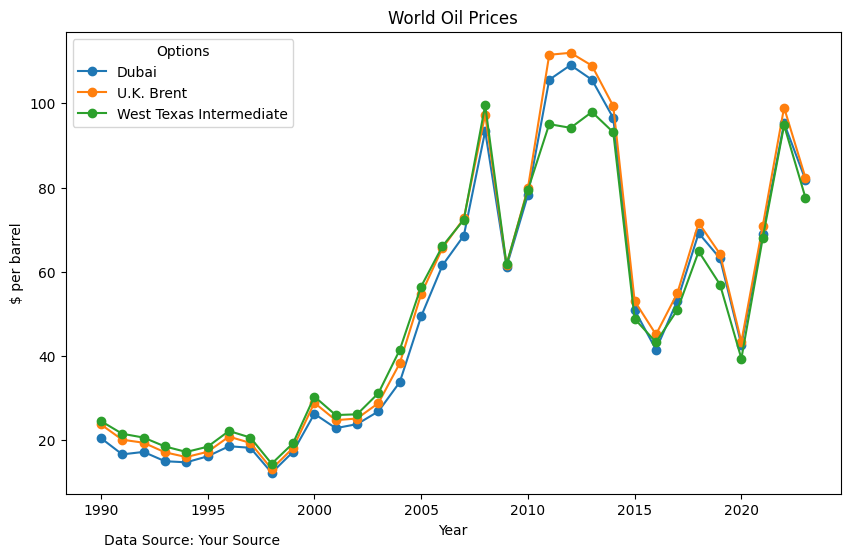

In [26]:
# Transpose the DataFrame for time series plotting
df_transposed = df.transpose()

# Plot each option as a time series
df_transposed.plot(kind='line', marker='o', figsize=(10, 6))

# Add text annotation for the data source at the bottom left
plt.text(0.05, -0.1, 'Data Source: Your Source', ha='left', va='center', transform=plt.gca().transAxes)

plt.title('World Oil Prices')
plt.xlabel('Year')
plt.ylabel('$ per barrel')
plt.legend(title='Options')
plt.show()



In [ ]:
df

In [13]:
#Exchange Rate Graph
excel_file_path = r'C:\Users\zan17\OneDrive\Documents\Academic Papers\Ecuador Exchange rate.xlsx'
dfex = pd.read_excel(excel_file_path)
dfex

,Year,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Ecuador Eschange Rate,15,15,15,15,15,15,15,15,15,...,1.448805,1.385731,1.344332,1.424134,1.390792,1.382826,1.440268,1.399594,1.330844,1.34167


In [14]:
# Reset the index and drop the existing indexdf
dfex.set_index(dfex.columns[0], inplace=True)

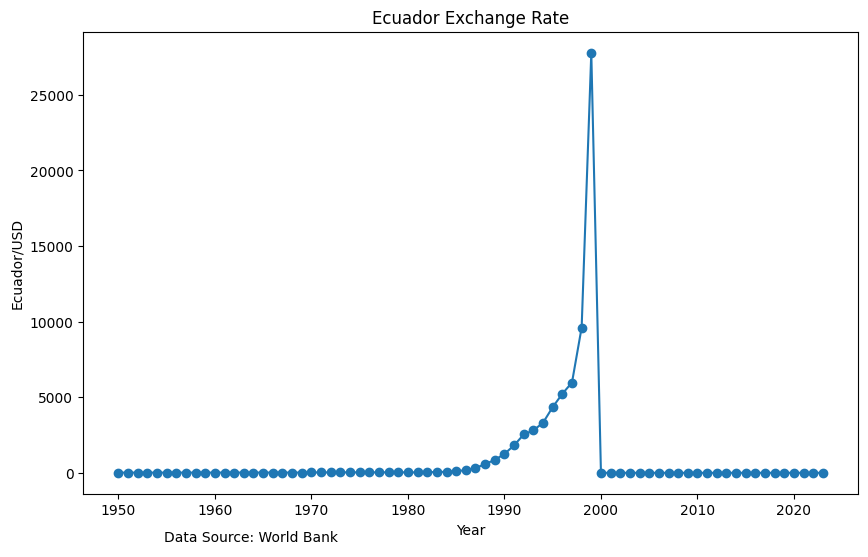

In [15]:
dfex.T.plot(kind='line', marker='o', figsize=(10, 6), legend=False)

plt.text(0.05, -0.1, 'Data Source: World Bank', ha='left', va='center', transform=ax.transAxes)


plt.title('Ecuador Exchange Rate')
plt.xlabel('Year')
plt.ylabel('Ecuador/USD')
plt.show()


In [16]:
#Pulling Data from FRED to check International Debt Statistics 
path_1=r'C:\Users\zan17\OneDrive\Documents\Academic Papers\IDSGAMRIAOEC.csv'
df2 = pd.read_csv(path_1)

In [17]:
import pandas as pd

new_df = df2.iloc[10:].copy()

# Rename columns
new_df.columns = ['FRED Graph Observations', 'Debt']

# Fill NaN values in the 'Debt' column
new_df['Debt'].fillna(10, inplace=True)



In [18]:
new_df.iloc[:, 0] = pd.to_datetime(new_df.iloc[:, 0])
new_df['Debt'] = pd.to_numeric(new_df['Debt'], errors='coerce')

Text(0, 0.5, 'Millions of US $')

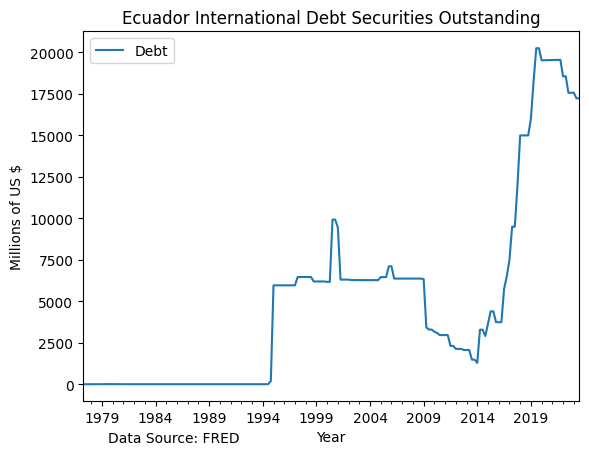

In [19]:
new_df.plot(x='FRED Graph Observations', y='Debt', title='Ecuador International Debt Securities Outstanding')
plt.text(0.05, -0.1, 'Data Source: FRED', ha='left', va='center', transform=plt.gca().transAxes)
plt.xlabel('Year')
plt.ylabel('Millions of US $')
